In [1]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Data Preparation

In [2]:
crypto_df = pd.read_csv(Path('crypto_data.csv'), index_col=0)
crypto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
target_df=crypto_df.loc[(crypto_df['IsTrading']==True)]
target_df


,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [4]:
new_target_df=target_df.drop(columns=['IsTrading'])
new_target_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
SERO,Super Zero,Ethash,PoW,NaN,1000000000
UOS,UOS,SHA-256,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [5]:
no_nulls_df=new_target_df.dropna()
no_nulls_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [6]:
total_coins_df=no_nulls_df.loc[(no_nulls_df['TotalCoinsMined']>0)]
total_coins_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [7]:
no_coin_name=total_coins_df.drop(columns=['CoinName'])
no_coin_name

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Equihash,PoW,7.296538e+06,21000000


In [9]:
# Use get_dummies() to create variables for text features.
X = pd.get_dummies(data=no_coin_name, columns=["Algorithm", "ProofType"])
print(X.shape)
X.head(10)

# Standardize the data with StandardScaler().
X = StandardScaler().fit_transform(X)
X[:5]

(532, 98)


array([[-0.11710817, -0.1528703 , -0.0433963 , -0.0433963 , -0.0433963 ,
        -0.06142951, -0.07530656, -0.0433963 , -0.06142951, -0.06142951,
        -0.0433963 , -0.0433963 , -0.19245009, -0.06142951, -0.09740465,
        -0.0433963 , -0.11547005, -0.07530656, -0.0433963 , -0.0433963 ,
        -0.15191091, -0.0433963 , -0.13118084, -0.0433963 , -0.0433963 ,
        -0.08703883, -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
        -0.06142951, -0.0433963 , -0.08703883, -0.08703883, -0.08703883,
        -0.0433963 , -0.13118084, -0.13840913, -0.13840913, -0.0433963 ,
        -0.06142951, -0.0433963 , -0.07530656, -0.18168574, -0.0433963 ,
        -0.0433963 , -0.0433963 , -0.07530656, -0.15826614, -0.31491833,
        -0.0433963 , -0.08703883, -0.07530656, -0.06142951,  1.38675049,
        -0.0433963 , -0.0433963 , -0.06142951, -0.0433963 , -0.0433963 ,
        -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
        -0.0433963 , -0.39879994, -0.0433963 , -0.1

In [ ]:
#coins_scaler = StandardScaler().fit_transform(no_coin_name_dummies)

Dimensionality Reduction

In [11]:
pca = PCA(n_components=0.9)
df_pca = pca.fit_transform(X)

In [12]:
coins_pca = pd.DataFrame(
    data=df_pca
)
coins_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,2.984956e-12,-5.587163e-15,-4.070858e-16,-0.007129,-1.319756,-0.051813,...,-2.470702e-15,1.891693e-15,-5.539121e-15,-1.279294e-15,-1.078497e-15,-3.351254e-15,3.226812e-15,9.572342e-16,-2.114694e-15,8.762218e-16
1,-0.318434,1.032331,-0.591126,0.001386,2.960484e-12,-5.826890e-15,-4.050436e-16,-0.007739,-1.322514,-0.056674,...,-2.751444e-15,1.650072e-15,-5.142541e-15,-7.870911e-16,-6.950084e-16,-3.692322e-15,3.801505e-15,2.285337e-15,-1.731003e-15,8.828233e-16
2,2.305468,1.656383,-0.683617,0.004731,1.016664e-11,-5.720923e-15,7.053242e-15,-0.054781,-1.542879,-0.943951,...,1.836982e-14,-1.610794e-14,4.401464e-14,9.704872e-15,-2.412961e-14,7.415236e-14,-7.963189e-14,-3.510378e-14,1.064824e-13,-6.609163e-14
3,-0.145184,-1.320593,0.192813,-0.001229,-2.640153e-12,2.427808e-15,-1.548256e-15,-0.002071,0.281463,0.251862,...,2.149155e-15,4.212773e-15,-2.388025e-17,-6.512118e-15,-3.653415e-15,6.466600e-15,-9.028861e-15,4.033250e-15,1.681151e-14,-9.086748e-15
4,-0.151768,-2.036192,0.396182,-0.001705,-3.658854e-12,-8.999548e-16,-1.106936e-15,0.027735,0.519099,0.188820,...,8.462173e-14,1.200669e-14,-4.413189e-14,1.435070e-14,1.071627e-14,-3.707038e-14,-3.236237e-14,-4.319863e-14,1.135017e-13,-1.393439e-13


In [13]:
pca.explained_variance_ratio_

array([0.0279317 , 0.02141802, 0.02051615, 0.02044661, 0.0204466 ,
       0.0204466 , 0.0204466 , 0.02042554, 0.01870913, 0.01756291,
       0.01741106, 0.01629007, 0.01596154, 0.01551138, 0.01435005,
       0.01321122, 0.01236583, 0.01206255, 0.01104295, 0.01071499,
       0.01049079, 0.01040887, 0.01039089, 0.01037741, 0.01035414,
       0.01034034, 0.01029605, 0.01028233, 0.01028139, 0.01028139,
       0.01028138, 0.01027965, 0.01027051, 0.01026331, 0.01026202,
       0.01025761, 0.01025565, 0.01025068, 0.01024924, 0.01024279,
       0.01024259, 0.01024259, 0.0102419 , 0.01024018, 0.01023676,
       0.01023495, 0.01023   , 0.01022442, 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ])

In [14]:
tsne = TSNE(learning_rate=35)

In [15]:
tsne_features = tsne.fit_transform(coins_pca)

In [16]:
tsne_features.shape

(532, 2)

In [17]:
# The first column of transformed features
coins_pca['x'] = tsne_features[:,0]

# The second column of transformed features
coins_pca['y'] = tsne_features[:,1]

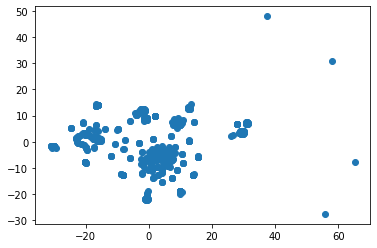

In [18]:
plt.scatter(coins_pca['x'], coins_pca['y'])
plt.show()

Cluster Analysis with k-Means

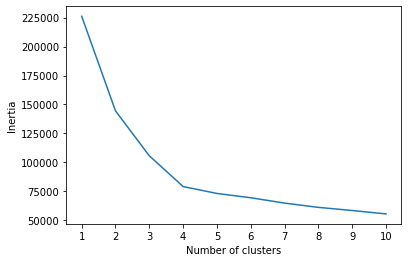

In [19]:
inertia = []
k = list(range(1, 11))
#k = [1,2,3,4,5,6,7,8,9,10]

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(coins_pca)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

We can safely say that our recommendation is to have two cryptocurrencies clustered together. 